In [21]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from sympy import symbols, Matrix

### Problem 9.4 p.9-29

In [11]:
# Define the function
def f(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4)

In [12]:
# Define the gradient

def d_f_1(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (2*x1 -1)
    
def d_f_2(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (4*x2)

def d_f(x1, x2):
    return np.array([d_f_1(x1, x2), d_f_2(x1, x2)]).reshape(2, 1)

In [13]:
# Define the hessian

def d2_f_11(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (4*(x1**2) - 4*x1 + 3)

def d2_f_22(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * (16*(x2**2) + 4)

def d2_f_21(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * ((2*x1 - 1) * 4*x2)

def d2_f_12(x1, x2):
    return np.exp(x1**2 - x1 + 2*(x2**2) + 4) * ((2*x1 - 1) * 4*x2)

def d2_f(x1, x2):
    return np.array([d2_f_11(x1, x2), d2_f_12(x1, x2), d2_f_21(x1, x2), d2_f_22(x1, x2)]).reshape(2, 2)

In [14]:
# Define the initale point
x = [np.array([1, -2]).reshape(2, 1)]

In [15]:
# Calculate the next point
for i in range(15):
    x.append(x[i] - np.matmul(linalg.inv(d2_f(x[i][0][0], x[i][1][0])), d_f(x[i][0][0], x[i][1][0])))

Text(0.5, 1.0, "Newton's method for optimization")

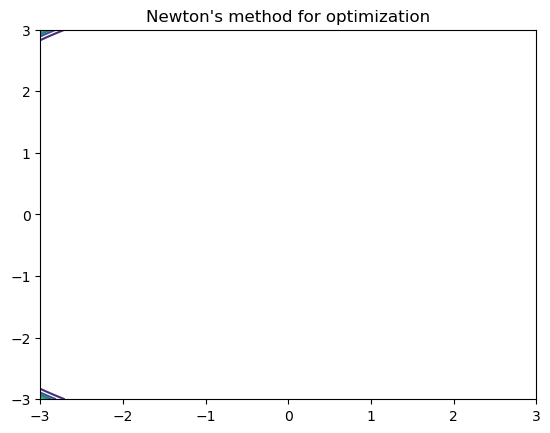

In [16]:
# Plot the function with the approximations

X = np.linspace(-3, 3, 1000)
Y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_title('Newton\'s method for optimization')

### Problem 9.5 p.9-31 

In [89]:
# Define the variables
x1, x2 = symbols('x_1 x_2')
x = Matrix([x1, x2])
al = 0.1

A = Matrix([[1, -1], [-1, 1]])

f = 1/2 * x.dot(A * x) 

In [90]:
df = Matrix([f.diff(i) for i in x])
d2f = Matrix([f.diff(i).diff(j) for j in x for i in x]).reshape(2, 2)

In [108]:
# Create function to calculate gradient at given x
def dfx(x1_, x2_):
    return df.subs([(x1, x1_), (x2, x2_)])

In [109]:
# Solve using Newtons method 
u = [(1, 0)]
# As A is not invertible, a stationary point 
# for the function does not exist
# u.append(u[0] - d2f**-1 * dfx(*u[0]))

In [111]:
# Solve using gradient descent
# Using alpha = 0.1
u = [Matrix([1, 0])]
for i in range(10):
    u.append(u[i] - al * dfx(u[i][0], u[i][1]))

In [115]:
u

[Matrix([
 [1],
 [0]]),
 Matrix([
 [0.9],
 [0.1]]),
 Matrix([
 [0.82],
 [0.18]]),
 Matrix([
 [0.756],
 [0.244]]),
 Matrix([
 [0.7048],
 [0.2952]]),
 Matrix([
 [0.66384],
 [0.33616]]),
 Matrix([
 [0.631072],
 [0.368928]]),
 Matrix([
 [0.6048576],
 [0.3951424]]),
 Matrix([
 [0.58388608],
 [0.41611392]]),
 Matrix([
 [0.567108864],
 [0.432891136]]),
 Matrix([
 [0.5536870912],
 [0.4463129088]])]

### Problem 9.6 p.9-32